In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math 
from numpy.linalg import inv
from scipy.stats import nbinom

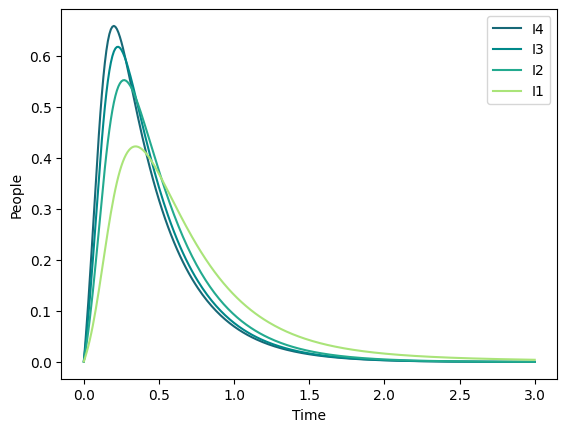

In [11]:
#### SubPopulation SIR MODEL ####
gamma = 3
p_1 = 1
p_2 = 2
p_3 = 3
p_4 = 4
dt = 0.01
days = 3

N_t = int(days/dt)
t = np.arange(start=0,stop=days+dt,step=dt)
S_1 = np.zeros(N_t+1)
I_1 = np.zeros(N_t+1)
S_2 = np.zeros(N_t+1)
I_2 = np.zeros(N_t+1)
S_3 = np.zeros(N_t+1)
I_3 = np.zeros(N_t+1)
S_4 = np.zeros(N_t+1)
I_4 = np.zeros(N_t+1)

S_1[0] = 0.999
I_1[0] = 0.001
S_2[0] = 0.999
I_2[0] = 0.001
S_3[0] = 0.999
I_3[0] = 0.001
S_4[0] = 0.999
I_4[0] = 0.001


for n in range(N_t):
    S_1[n+1] = S_1[n] - (p_1 * S_1[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                         ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_2[n+1] = S_2[n] - (p_2 * S_2[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_3[n+1] = S_3[n] - (p_3 * S_3[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_4[n+1] = S_4[n] - (p_4 * S_4[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    
    I_1[n+1] = I_1[n] + (p_1 * S_1[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_1[n])*dt
    I_2[n+1] = I_2[n] + (p_2 * S_2[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_2[n])*dt
    I_3[n+1] = I_3[n] + (p_3 * S_3[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_3[n])*dt
    I_4[n+1] = I_4[n] + (p_4 * S_4[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_4[n])*dt

    #if n == 3:
        #print(S_1)
        #print(I_1)
        #break
fig = plt.figure()
#l1 = plt.plot(t, S, label = 'S - Devin', color = 'red')
l1 = plt.plot(t, I_4, label = 'I4', color = '#176877', linestyle='-',)
l2 = plt.plot(t, I_3, label = 'I3', color = '#00898A', linestyle='-',)
l3 = plt.plot(t, I_2, label = 'I2', color = '#23AA8F', linestyle='-',)
l4 = plt.plot(t, I_1, label = 'I1', color = '#AAE479', linestyle='-',)
plt.xlabel('Time')
plt.ylabel('People')
plt.title('')
plt.legend()
plt.show()
        

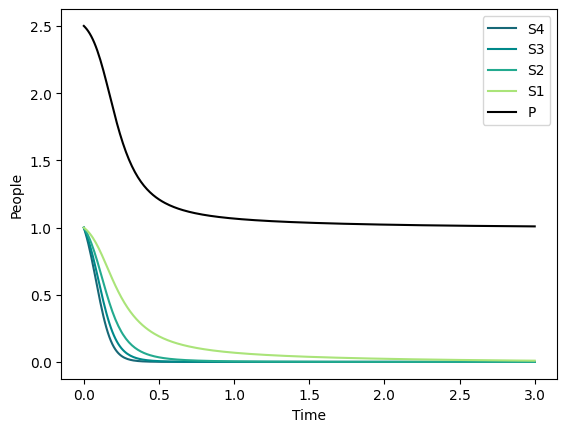

In [13]:
#### SubPopulation SIR MODEL weighted Average Function ####
gamma = 3
p_1 = 1
p_2 = 2
p_3 = 3
p_4 = 4
dt = 0.01
days = 3

N_t = int(days/dt)
t = np.arange(start=0,stop=days+dt,step=dt)
S_1 = np.zeros(N_t+1)
I_1 = np.zeros(N_t+1)
S_2 = np.zeros(N_t+1)
I_2 = np.zeros(N_t+1)
S_3 = np.zeros(N_t+1)
I_3 = np.zeros(N_t+1)
S_4 = np.zeros(N_t+1)
I_4 = np.zeros(N_t+1)
P = np.zeros(N_t+1)

S_1[0] = 0.999
I_1[0] = 0.001
S_2[0] = 0.999
I_2[0] = 0.001
S_3[0] = 0.999
I_3[0] = 0.001
S_4[0] = 0.999
I_4[0] = 0.001
P[0] = ((p_1*S_1[0])+(p_2*S_2[0])+(p_3*S_3[0])+(p_4*S_4[0]))/(S_1[0]+S_2[0]+S_3[0]+S_4[0])
        
for n in range(N_t):
    S_1[n+1] = S_1[n] - (p_1 * S_1[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                         ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_2[n+1] = S_2[n] - (p_2 * S_2[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_3[n+1] = S_3[n] - (p_3 * S_3[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    S_4[n+1] = S_4[n] - (p_4 * S_4[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt
    
    P[n+1] = ((p_1*S_1[n+1])+(p_2*S_2[n+1])+(p_3*S_3[n+1])+(p_4*S_4[n+1]))/(S_1[n+1]+S_2[n+1]+S_3[n+1]+S_4[n+1])
    
    I_1[n+1] = I_1[n] + (p_1 * S_1[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_1[n])*dt
    I_2[n+1] = I_2[n] + (p_2 * S_2[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_2[n])*dt
    I_3[n+1] = I_3[n] + (p_3 * S_3[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_3[n])*dt
    I_4[n+1] = I_4[n] + (p_4 * S_4[n] * ((0.45 * (I_1[n]/0.5)) + (0.45 + (I_2[n]/0.5)) + \
                                        ((0.45 * (I_3[n]/0.5)) + (0.45 + (I_4[n]/0.5)))))*dt - (gamma * I_4[n])*dt


        #break
fig = plt.figure()
l1 = plt.plot(t, S_4, label = 'S4', color = '#176877', linestyle='-',)
l2 = plt.plot(t, S_3, label = 'S3', color = '#00898A', linestyle='-',)
l3 = plt.plot(t, S_2, label = 'S2', color = '#23AA8F', linestyle='-',)
l4 = plt.plot(t, S_1, label = 'S1', color = '#AAE479', linestyle='-',)
l4 = plt.plot(t, P, label = 'P', color = 'black', linestyle='-',)
plt.xlabel('Time')
plt.ylabel('People')
plt.title('')
plt.legend()
plt.show()     

In [50]:
### Superspreader Simulation ### 
# is the assumption that the previous branches can no longer infect 
# is it just the new generation of infection being used for the NB draws
k = 0.1 # Dispersion Parameter k
R0 = 3 # Mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)


outbreak_results = []
trials = 200000
d = 0
for i in range(trials):
    outbreak = True
    infected = 1
    total_inf = 0
    if i % 10000 == 0:
        print(i)
    while outbreak:
        infected = sum(nbinom.rvs(n=n,p=p, size = infected))
        if infected == 0:
            outbreak = False
            if total_inf > 1:
                d += 1
                outbreak_results.append(total_inf) # outbreak dies
        #print(d, infected)
        total_inf += infected
        if total_inf > 100:
            outbreak = False
            #outbreak_results.append(1) # outbreak does not die
        #d += 1
        #if d % 100 == 0:
            #print("Iteration: ", d, " No. Infected: ", infected)
            #break

#print(outbreak_results.count(0)/trials) # count number of times outbreak died

        

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [90]:
### Superspreader Simulation ### 
# is the assumption that the previous branches can no longer infect 
# is it just the new generation of infection being used for the NB draws
k = 10 # Dispersion Parameter k
R0 = 3 # Mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)


outbreak_results2 = []
trials = 200000
d = 0
while d < 100000:
    outbreak = True
    infected = 1
    total_inf = 0
    if d % 20000 == 0:
        print(d)
    while outbreak:
        infected = sum(nbinom.rvs(n=n,p=p, size = infected))
        if infected == 0:
            outbreak = False
            if total_inf > 1:
                d += 1
                outbreak_results2.append(total_inf) 
        total_inf += infected
        if total_inf > 100:
            outbreak = False


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

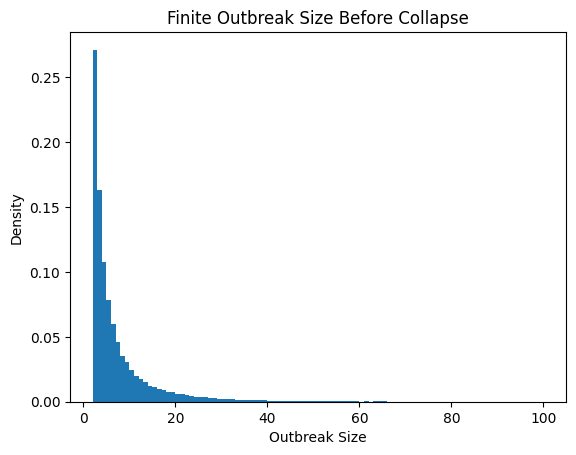

In [89]:
import seaborn as sns
outbreak_results1 = outbreak_results

#plt.hist(outbreak_results, bins = 98, density = True)
plt.hist(outbreak_results1, bins = 98, color='g', label='k=0.1')
plt.hist(outbreak_results2, bins = 98, color='b', label='k=10')
plt.gca().set(title='Finite Outbreak Size Before Collapse', ylabel='Probability')
plt.xlim(50,75)
plt.legend();
#plt.ylim(ymin=-500, ymax = 30000)
plt.xlabel('Outbreak Size')
plt.ylabel('Density')
plt.title('Finite Outbreak Size Before Collapse')
plt.show()

In [66]:
x = np.array(outbreak_results)
print(len(np.unique(x)))
print(np.unique(x))
print(outbreak_results.count(98))

98
[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  96  97  98  99 100]
3
